 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_return = Path("../Starter_Code/Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_return_pd = pd.read_csv(whale_return, parse_dates=True, infer_datetime_format=True,index_col="Date")

In [4]:
# Count nulls
whale_return_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_return_pd = whale_return_pd.dropna()
whale_return_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_return = Path("../Starter_Code/Resources/algo_returns.csv")
algo_return_pd = pd.read_csv(algo_return, parse_dates=True, infer_datetime_format=True, index_col="Date")

In [7]:
# Count nulls
algo_return_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_return_pd = algo_return_pd.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsk_history = Path("../Starter_Code/Resources/sp_tsx_history.csv")
sp_tsk_history_pd = pd.read_csv(sp_tsk_history, parse_dates=True, infer_datetime_format=True,index_col="Date")

In [10]:
# Check Data Types
sp_tsk_history_pd.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsk_history_pd['Close'] = sp_tsk_history_pd['Close'].str.replace('$','',regex=False)

sp_tsk_history_pd['Close'] = sp_tsk_history_pd['Close'].str.replace(',','',regex=False)

sp_tsk_history_pd['Close'] = sp_tsk_history_pd['Close'].astype(float)

In [12]:
# Calculate Daily Returns
sp_tsk_history_pd = sp_tsk_history_pd.pct_change() 

In [13]:
# Drop nulls
sp_tsk_history_pd = sp_tsk_history_pd.dropna()

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsk_history_pd = sp_tsk_history_pd.rename(columns={"Close":"S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_data = pd.concat([whale_return_pd,sp_tsk_history_pd,algo_return_pd],axis='columns', join = 'inner')

all_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.005447,0.001303


In [16]:
all_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX,Algo 1,Algo 2
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,-0.000628,0.000682,-0.007247
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002254,0.002981,0.005256
2019-04-29,0.001254,0.002719,0.006251,0.005223,-0.000788,0.005208,0.002829
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.001183,-0.002944,-0.001570
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,-0.004703,0.000094,-0.007358


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

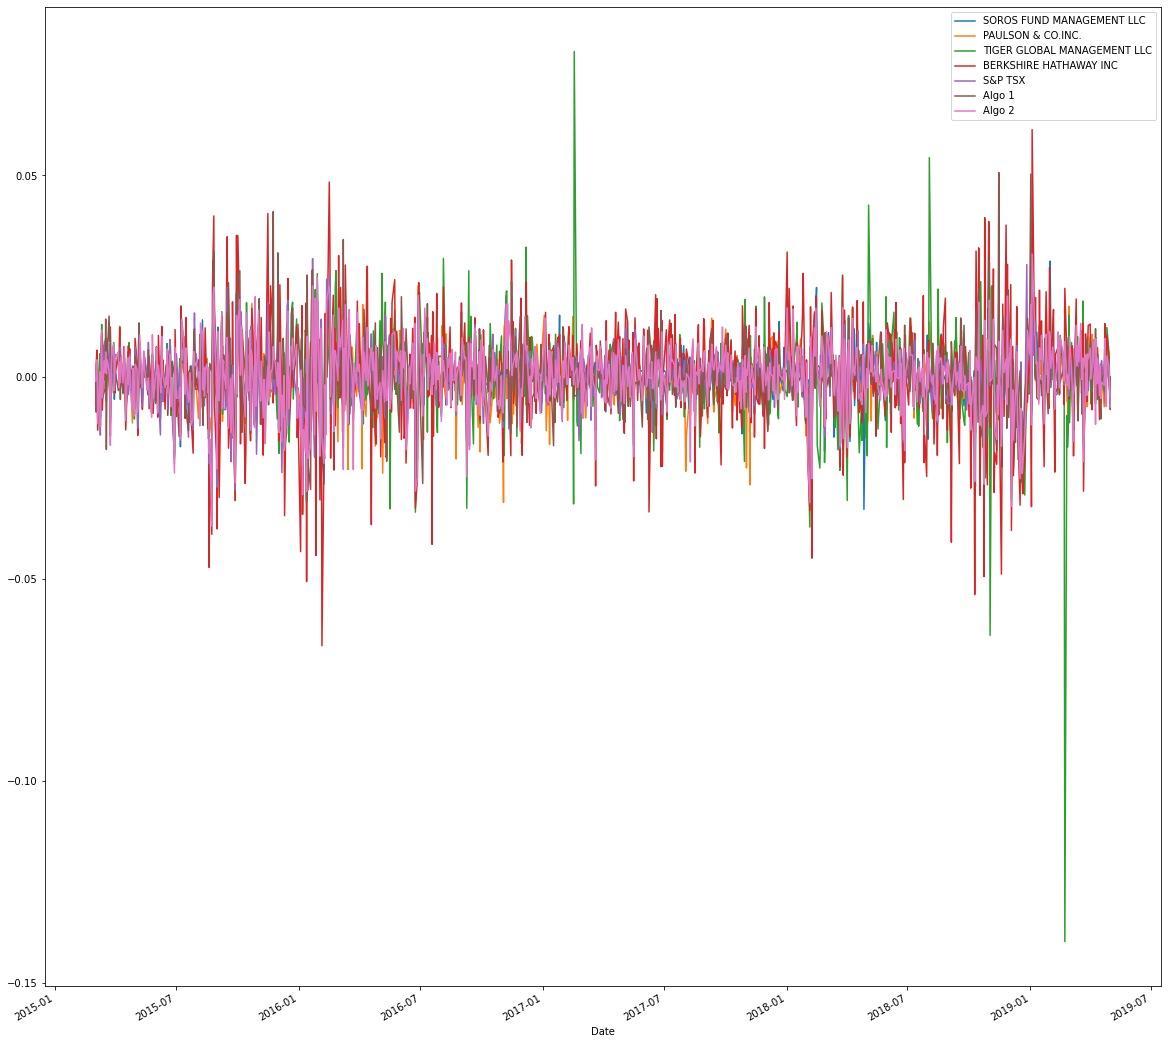

In [17]:
# Plot daily returns of all portfolios

all_data.plot(figsize=(20,20))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

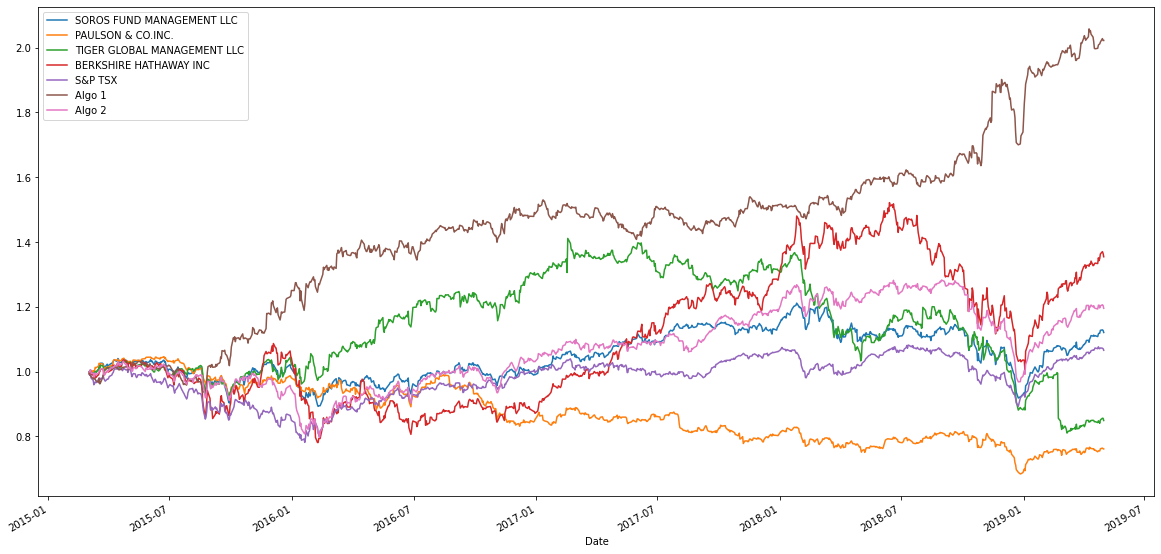

In [18]:
# Calculate cumulative returns of all portfolios

all_data_cumulative_return =(1+all_data).cumprod()

# Plot cumulative returns
all_data_cumulative_return.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

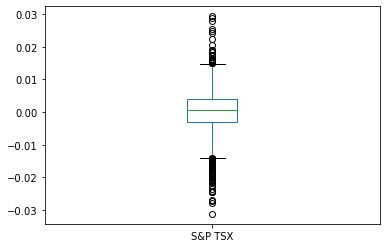

In [19]:
# Box plot to visually show risk

sp_tsk_history_pd.plot(kind='box')

<AxesSubplot:>

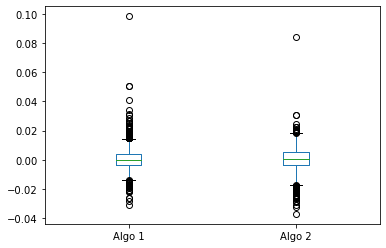

In [20]:
algo_return_pd.plot(kind='box')

<AxesSubplot:>

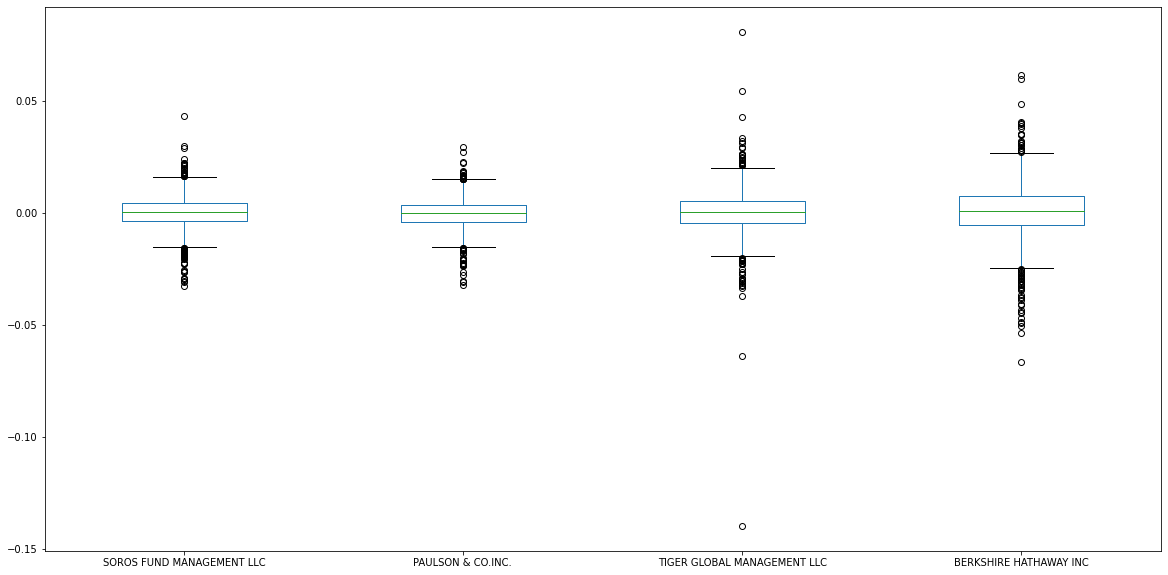

In [21]:
whale_return_pd.plot(kind = 'box',figsize = (20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios

all_data_daily = all_data.std()


### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60

all_data_daily.sort_values(ascending=True).copy()

# Determine which portfolios are riskier than the S&P TSX 60

print ("Algo 1, SOROS FUND MANAGEMENT LLC, Algo 2, TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are more riskier. This is because they have higher standard deviation.")   

Algo 1, SOROS FUND MANAGEMENT LLC, Algo 2, TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are more riskier. This is because they have higher standard deviation.


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
all_data_annualised = all_data_daily*np.sqrt(252)

all_data_annualised.sort_values(ascending=True)

PAULSON & CO.INC.              0.110841
S&P TSX                        0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

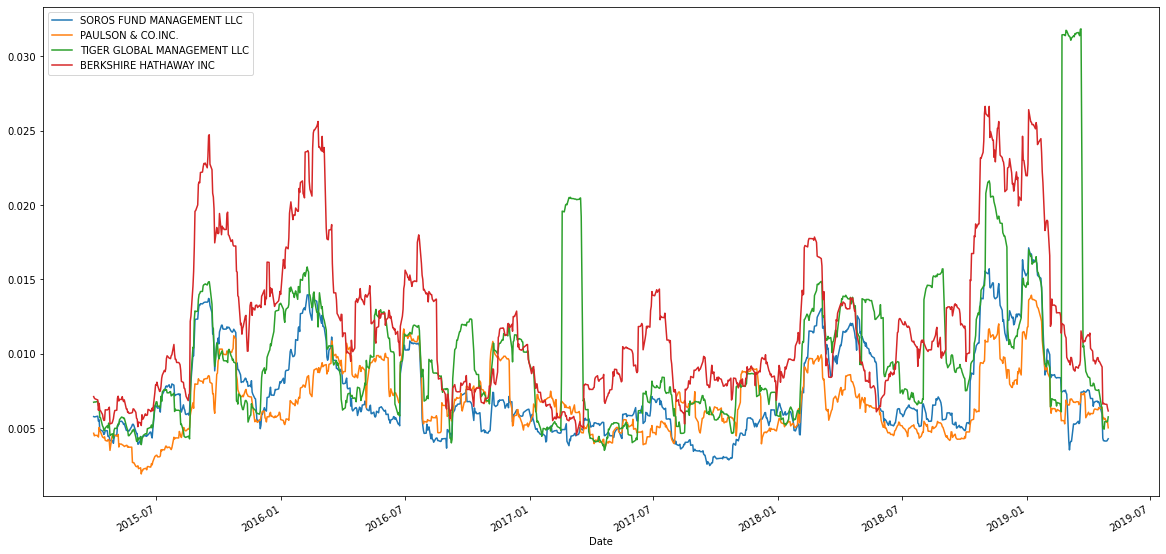

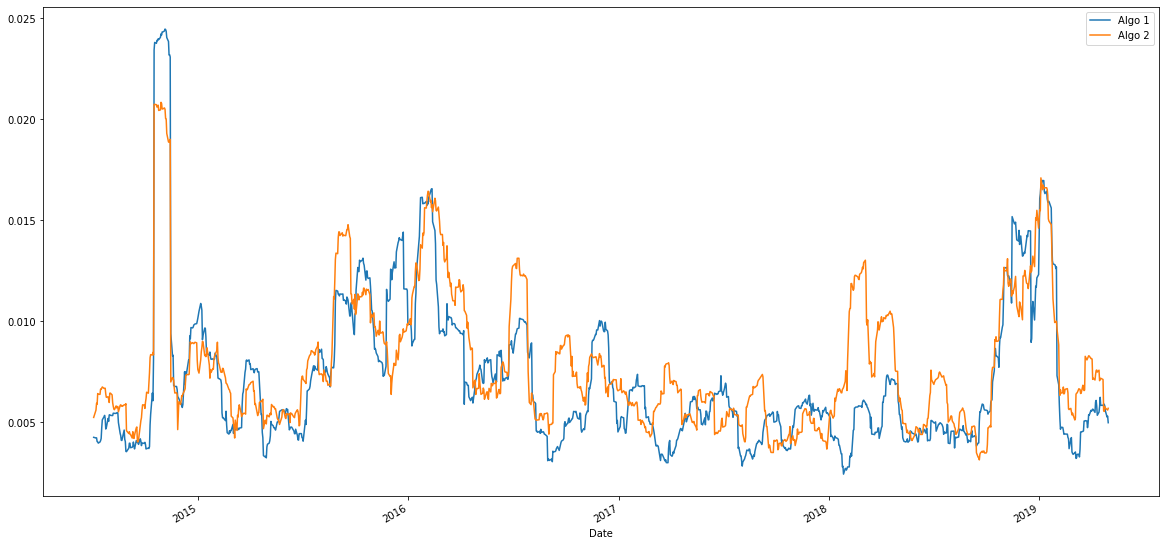

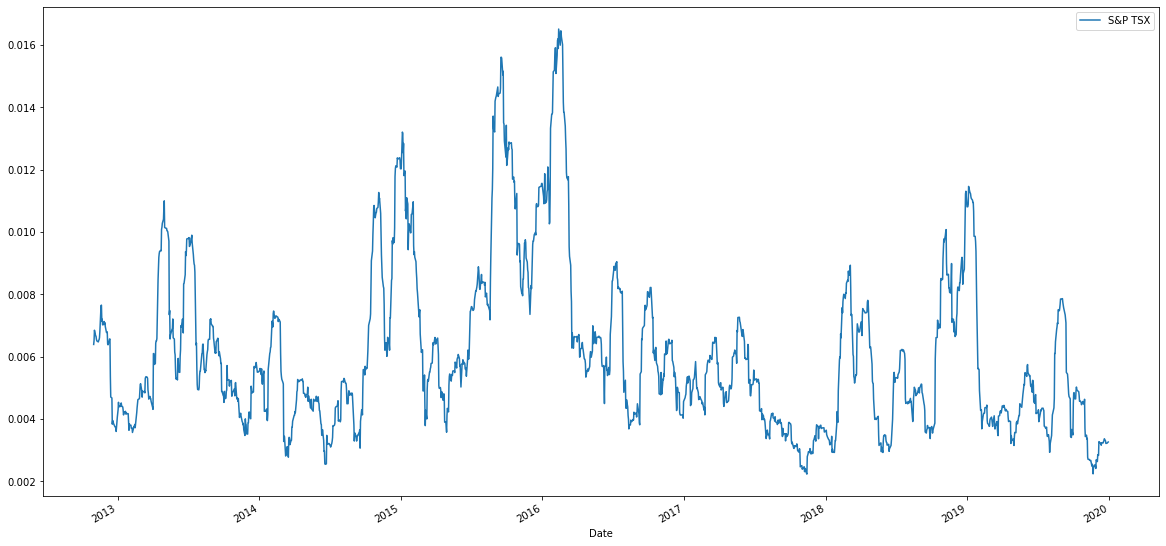

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

whale_rolling = whale_return_pd.rolling(window=21)

algo_rolling = algo_return_pd.rolling(window=21)

sp_tsk_rolling = sp_tsk_history_pd.rolling(window=21)

# Plot the rolling standard deviation

whale_rolling.std().plot(figsize=(20,10))

algo_rolling.std().plot(figsize=(20,10))

sp_tsk_rolling.std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

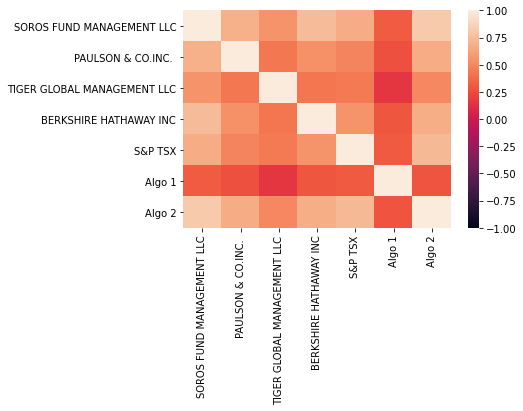

In [26]:
# Calculate the correlation

correlation = all_data.corr()

# Display the correlation matrix

sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

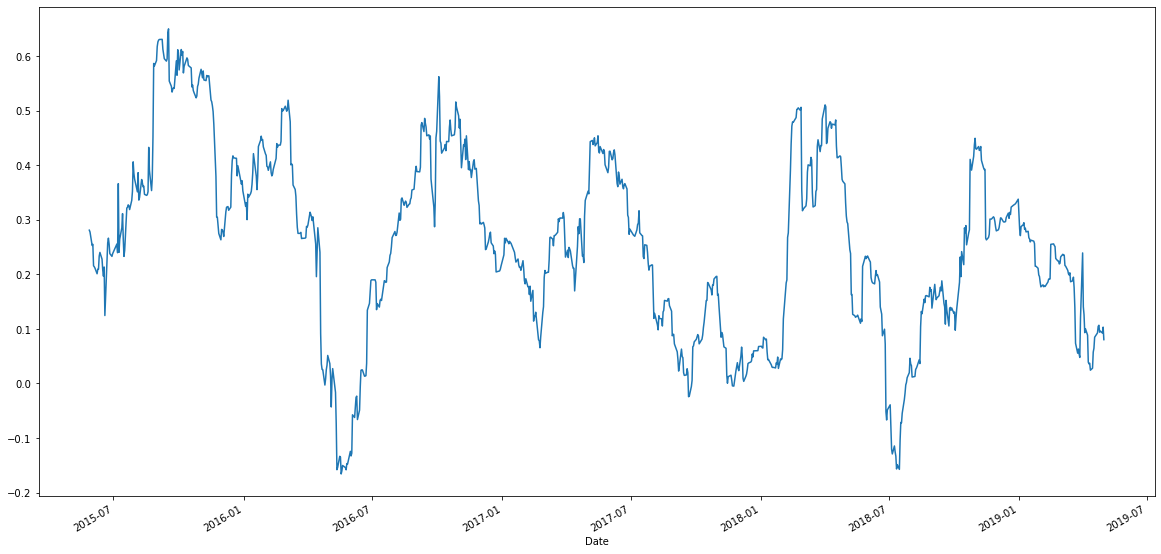

In [27]:
# Calculate covariance of a single portfolio

rolling_covariance = all_data['Algo 1'].rolling(window=60).cov(all_data['S&P TSX'])

# Calculate variance of S&P TSX

rolling_variance = all_data['Algo 1'].rolling(window=60).var()

# Computing beta

beta = rolling_covariance/rolling_variance

# Plot beta trend

beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

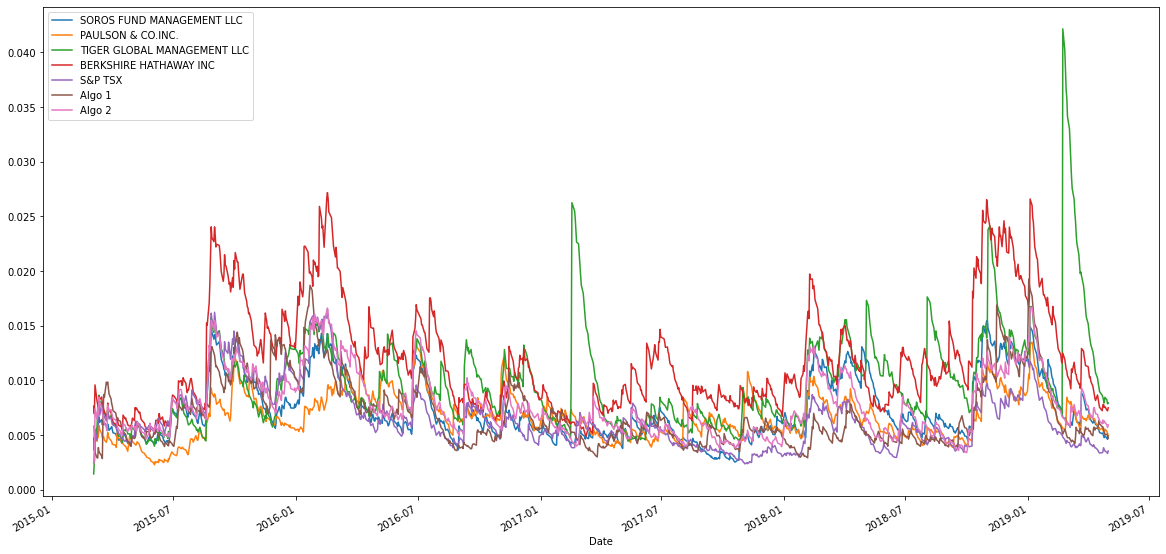

In [28]:
# Use `ewm` to calculate the rolling window


rolloing_window = all_data.ewm(span=21).std()

rolloing_window.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios. T&S TSX has been used as risk free rate. 

sharp_ratio = ((all_data.mean()-all_data['S&P TSX'].mean()) * 252) / (all_data.std() * np.sqrt(252))

<AxesSubplot:>

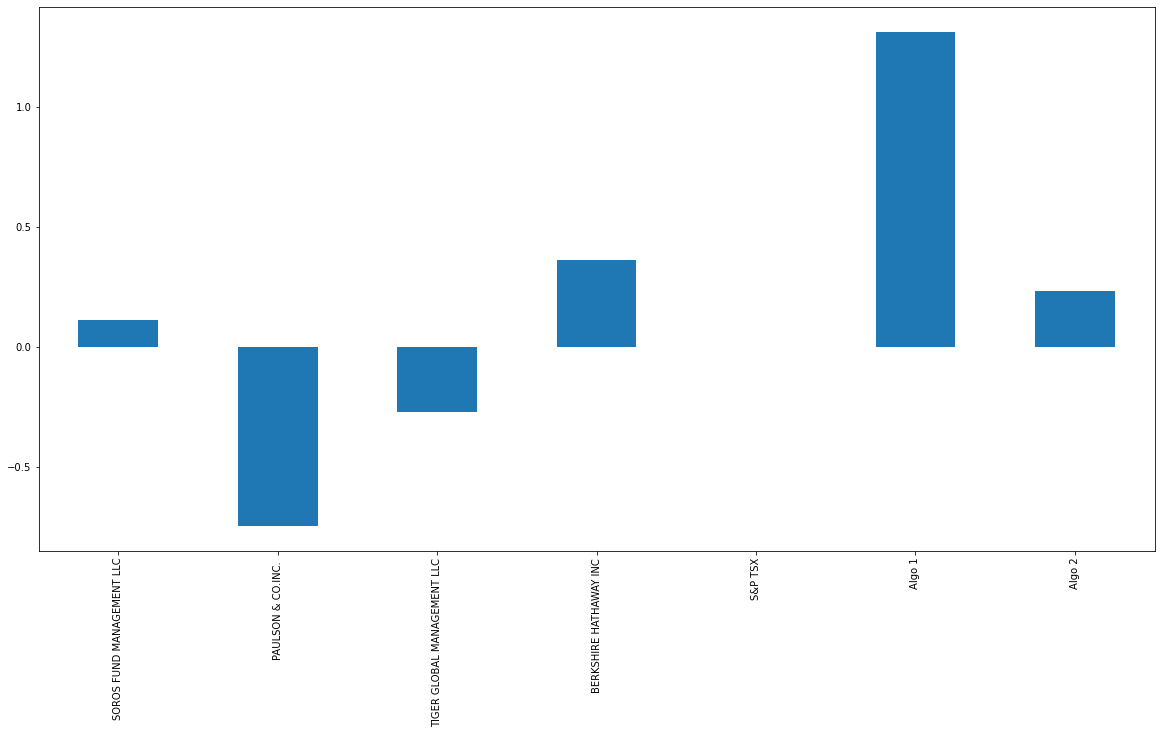

In [30]:
# Visualize the sharpe ratios as a bar plot

sharp_ratio.plot(kind='bar',figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

From sharpe ratio diagram, Algorithmic strategies outperforms whales porfoilio by having positive and higher sharpe ratio value. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
import datetime

In [33]:
google_price_pd = Path("../Starter_Code/GOOGLE - GOOGLE.csv")

microsoft_pd = Path("../Starter_Code/MSFT - Sheet1.csv")

telsa_pd = Path("../Starter_Code/TSLA - Sheet1.csv")


google_price = pd.read_csv(google_price_pd,parse_dates=True, infer_datetime_format=True, index_col='Date')

microsoft = pd.read_csv(microsoft_pd,parse_dates=True, infer_datetime_format=True, index_col='Date')

telsa = pd.read_csv(telsa_pd,parse_dates=True, infer_datetime_format=True, index_col='Date')


google_price.head()

,Close
Date,
2015-03-03,572.07
2015-03-04,571.80
2015-03-05,573.75
2015-03-06,566.13
2015-03-09,567.29


In [35]:
# Combine all stocks in a single DataFrame

portfoilio = pd.concat([google_price,microsoft,telsa], axis = 1, join = 'inner')

portfoilio.head()

,Close,Close,Close
Date,,,
2015-03-03,572.07,43.28,39.91
2015-03-04,571.80,43.06,40.49
2015-03-05,573.75,43.11,40.13
2015-03-06,566.13,42.36,38.78
2015-03-09,567.29,42.85,38.18


In [36]:
# Reorganize portfolio data by having a column per symbol

portfoilio.columns=['Google','Microsoft','Telsa']

portfoilio.head()

,Google,Microsoft,Telsa
Date,,,
2015-03-03,572.07,43.28,39.91
2015-03-04,571.80,43.06,40.49
2015-03-05,573.75,43.11,40.13
2015-03-06,566.13,42.36,38.78
2015-03-09,567.29,42.85,38.18


In [37]:
# Calculate daily returns

portfoilio_1 = portfoilio.pct_change()

# Drop NAs

portfoilio_1 = portfoilio_1.dropna()

# Display sample data

portfoilio_1.head()


,Google,Microsoft,Telsa
Date,,,
2015-03-04,-0.000472,-0.005083,0.014533
2015-03-05,0.003410,0.001161,-0.008891
2015-03-06,-0.013281,-0.017397,-0.033641
2015-03-09,0.002049,0.011568,-0.015472
2015-03-10,-0.024326,-0.019137,-0.003143


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

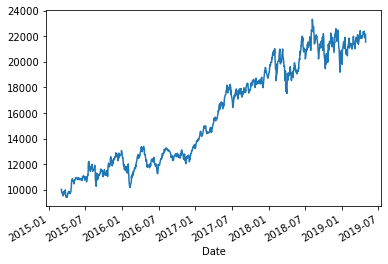

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = portfoilio_1.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

# Display sample data

initial_investment= 10000


(initial_investment * cumulative_returns).plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame

all_portfoilio = pd.concat([portfoilio_1,all_data], axis = 1 , join = "inner")


all_portfoilio.head()

,Google,Microsoft,Telsa,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX,Algo 1,Algo 2
Date,,,,,,,,,,
2015-03-04,-0.000472,-0.005083,0.014533,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416
2015-03-05,0.003410,0.001161,-0.008891,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323
2015-03-06,-0.013281,-0.017397,-0.033641,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460
2015-03-09,0.002049,0.011568,-0.015472,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.005447,0.001303
2015-03-10,-0.024326,-0.019137,-0.003143,-0.010263,-0.005341,-0.012079,-0.009739,-0.014321,-0.001392,-0.012155


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

all_portfoilio.dropna()

,Google,Microsoft,Telsa,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX,Algo 1,Algo 2
Date,,,,,,,,,,
2015-03-04,-0.000472,-0.005083,0.014533,0.002230,0.003241,-0.002534,0.004213,-0.003371,-0.008589,0.002416
2015-03-05,0.003410,0.001161,-0.008891,0.004016,0.004076,0.002355,0.006726,0.001344,-0.000955,0.004323
2015-03-06,-0.013281,-0.017397,-0.033641,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972,-0.004957,-0.011460
2015-03-09,0.002049,0.011568,-0.015472,0.000582,0.004225,0.005843,-0.001652,-0.006555,-0.005447,0.001303
2015-03-10,-0.024326,-0.019137,-0.003143,-0.010263,-0.005341,-0.012079,-0.009739,-0.014321,-0.001392,-0.012155
...,...,...,...,...,...,...,...,...,...,...
2019-04-24,-0.006761,-0.003428,-0.019894,0.002284,0.001009,-0.004000,-0.006386,-0.004972,0.001095,0.000399
2019-04-25,0.005932,0.033117,-0.042529,-0.000285,-0.001291,-0.005153,0.004848,-0.000628,0.000682,-0.007247
2019-04-26,0.006910,0.005730,-0.050474,0.008149,0.009162,0.012355,0.010434,0.002254,0.002981,0.005256


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

<AxesSubplot:>

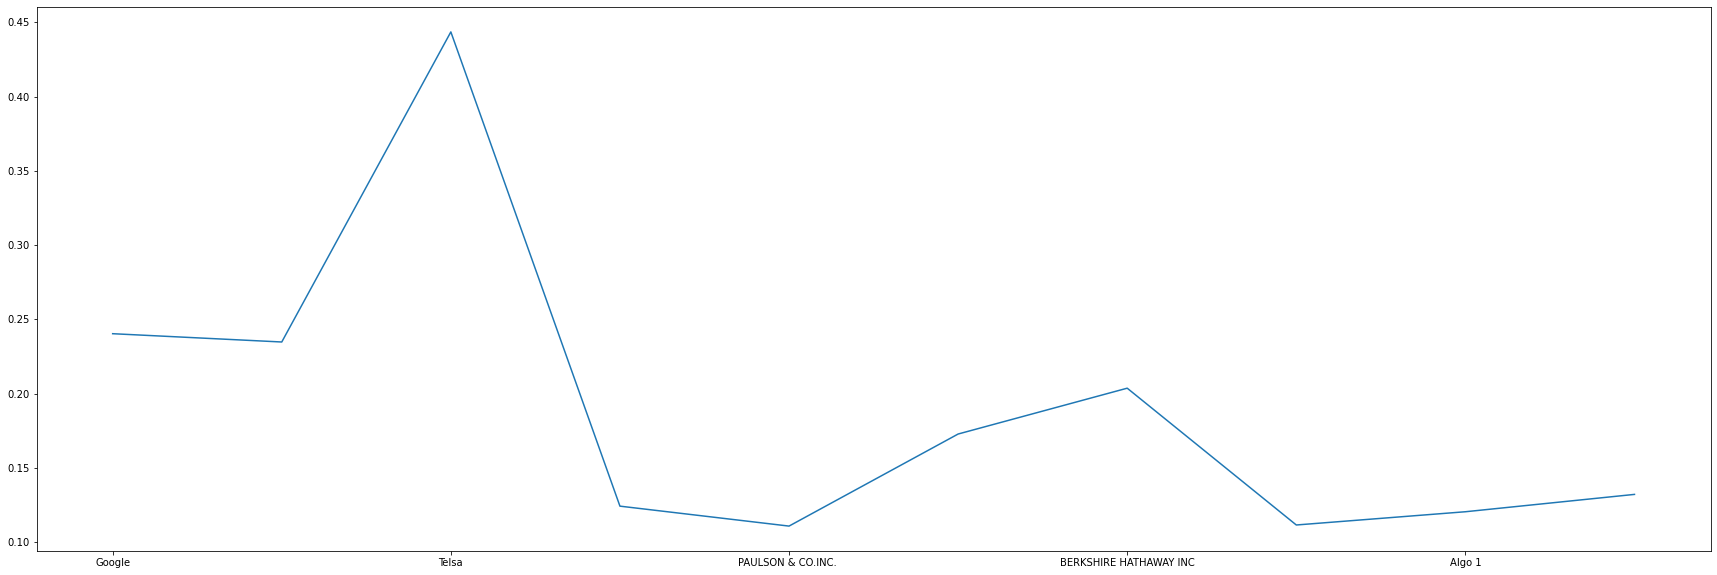

In [59]:
# Calculate the annualized `std

std_all_portfoilio = all_portfoilio.std()*np.sqrt(252)

std_all_portfoilio.plot(figsize=(30,10))

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

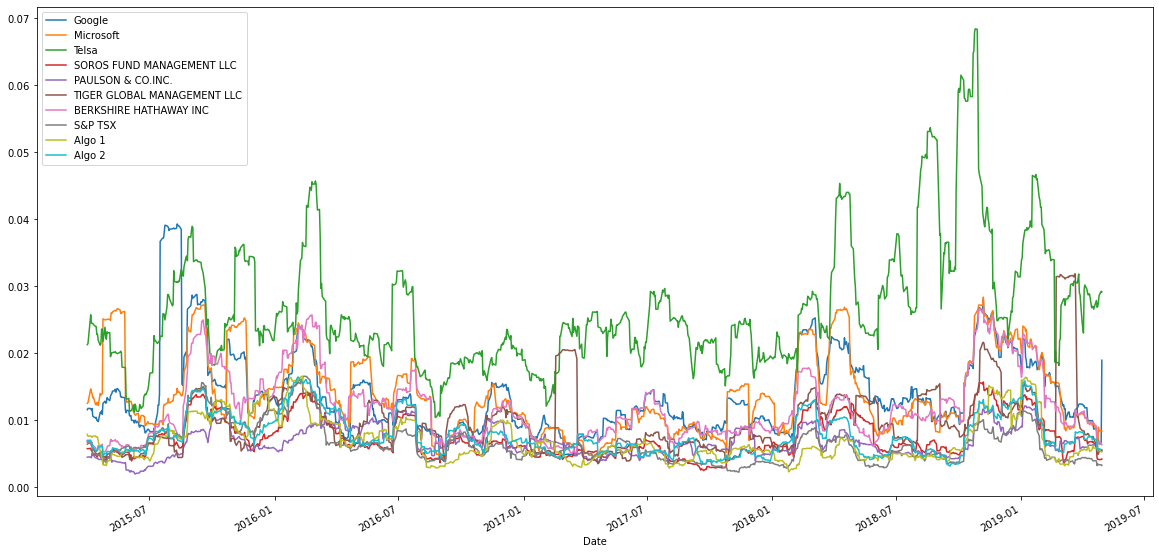

In [44]:
# Calculate rolling standard deviation

rolling_std_portfoilio = all_portfoilio.rolling(window=21)


# Plot rolling standard deviation

rolling_std_portfoilio.std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

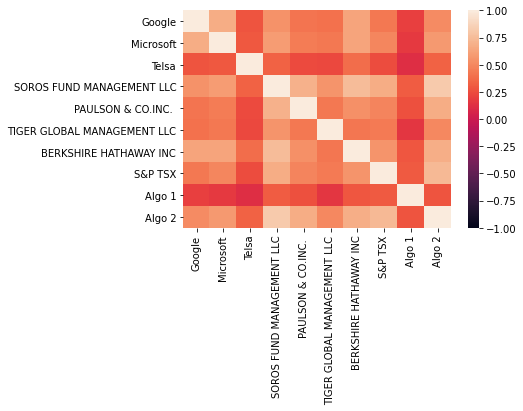

In [45]:
# Calculate and plot the correlation

portfoilio_correlation = all_portfoilio.corr()

sns.heatmap(portfoilio_correlation, vmin= -1, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

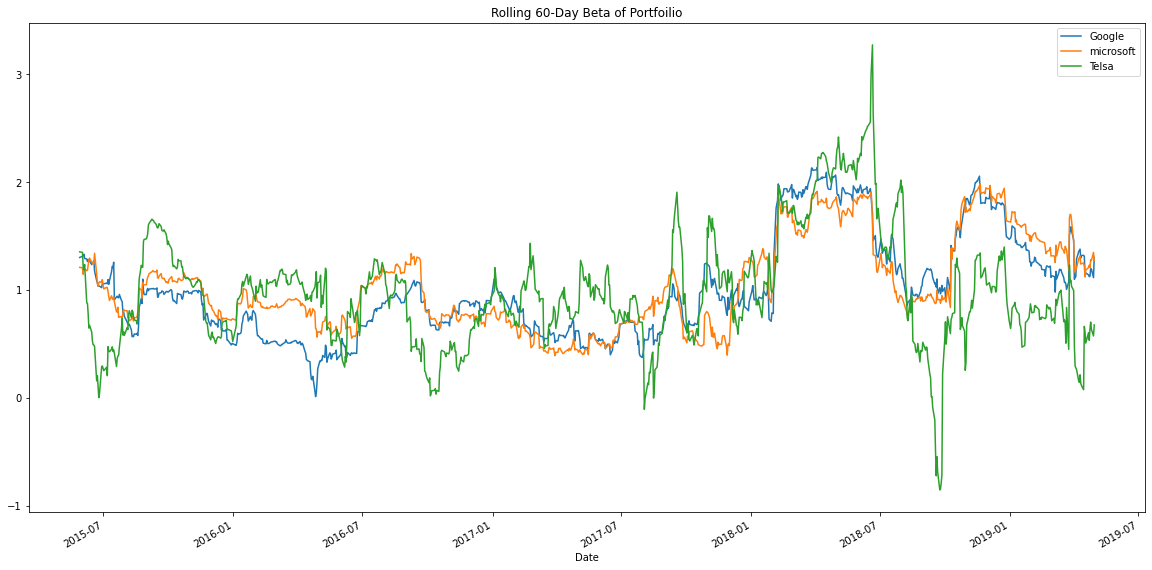

In [55]:
# Calculate and plot Beta 

google_covariance = all_portfoilio['Google'].rolling(window=60).cov(all_portfoilio['S&P TSX'])

microsoft_covariance = all_portfoilio['Microsoft'].rolling(window=60).cov(all_portfoilio['S&P TSX'])

Telsa_covariance = all_portfoilio['Telsa'].rolling(window=60).cov(all_portfoilio['S&P TSX'])

variance = all_portfoilio['S&P TSX'].rolling(window=60).var()

google_beta = google_covariance/variance

microsoft_beta = microsoft_covariance/variance

Telsa_beta = Telsa_covariance/variance

ax = google_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Portfoilio')
microsoft_beta.plot(ax=ax)
Telsa_beta.plot(ax=ax)
ax.legend(["Google","microsoft","Telsa"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios = ((all_portfoilio.mean()-all_portfoilio['S&P TSX'].mean()) * 252) / (all_portfoilio.std() * np.sqrt(252))

<AxesSubplot:>

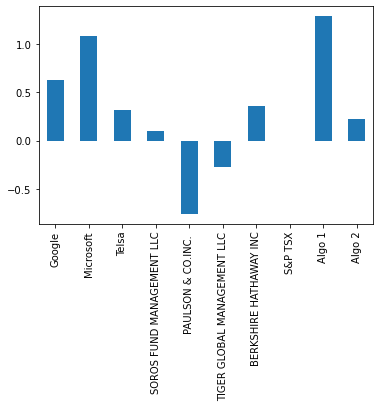

In [57]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

From the weighted return average data, the portfoilio shows good return. The highest return was $2,3000 with $1,0000 initial investment. 

In terms of portfoilio diversification, Telsa is less correlated with Microsoft and Google (~ 0.2 from a scale of 1~ -1,from heat map). Google and microsoft are more correlated (0.6 from a scale of 1~-1, from heat map). 

From beta value, Telsa shows strong sensitivity to the market movement relative to google and microsoft (S&P TSX). The highest beta Telsa has scored was above 3 in 2018-7. 

Overall, the investment portfoilio analysis suggest the portfoilio is high risk, high return. 